# Методы машинного обучения. 
## ЛР4. – Наивный байесовский классификатор.
Осуществить исследование исходных данных. Решить задачу классификации с использованием наивного байесовского классификатора, основанного на принципе максимума апостериорной вероятности. В качестве исходных данных можно использовать таблицу «Ирисов Фишера» (можно какой-то свой датасет). 
В рамках исследования исходных данных:
- Построить гистограммы распределения значений для каждого признака и для каждого класса.
- Произвести визуализацию проекций классов на плоскости, где по осям  отложены различные комбинации пар признаков.
- Построить матрицы корреляций между различными признаками, как для всей выборки в целом, так и для отдельных классов.
- Построить наивный байесовский классификатор.
- Оценить точность, полноту, F-меру. Построить матрицу ошибок.


In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Загрузка данных
mushrooms = pd.read_csv('data/mushrooms.csv')

# Замена категориальных значений числовыми
mushrooms = mushrooms.replace({'e': 0, 'p': 1})
mushrooms = pd.get_dummies(mushrooms, columns=mushrooms.columns, drop_first=True)


In [3]:
mushrooms

,class_1,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_1,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


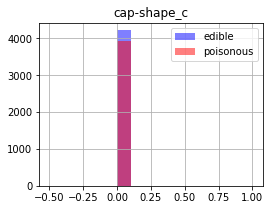

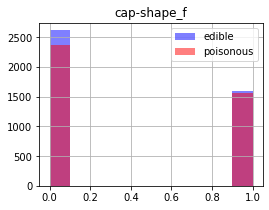

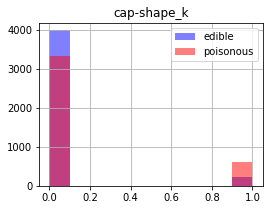

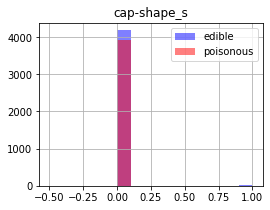

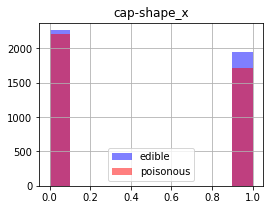

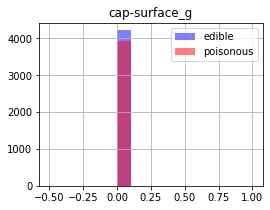

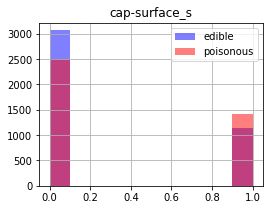

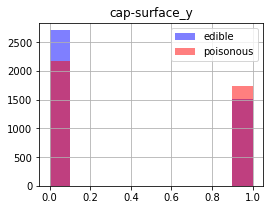

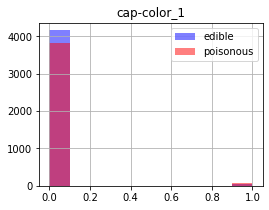

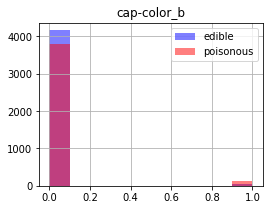

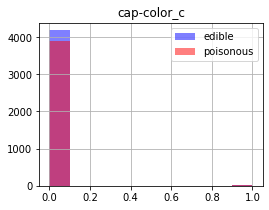

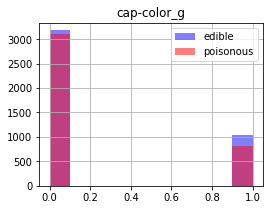

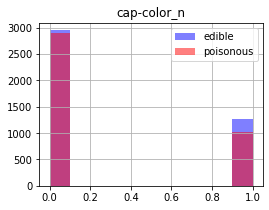

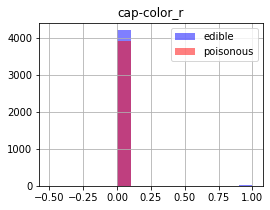

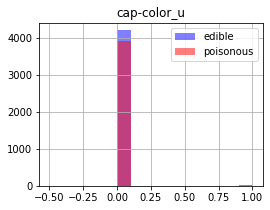

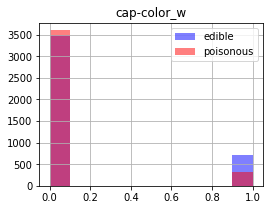

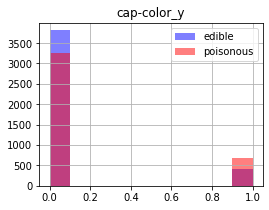

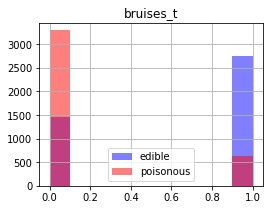

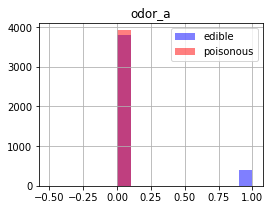

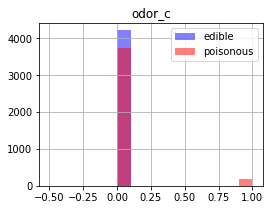

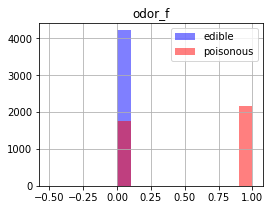

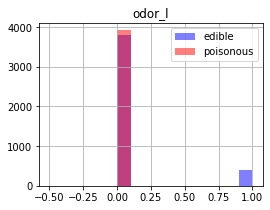

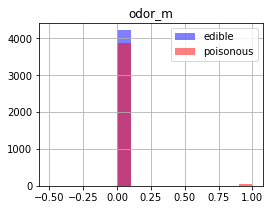

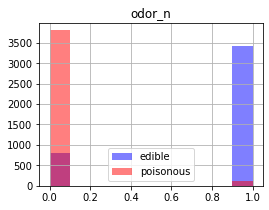

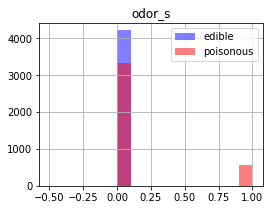

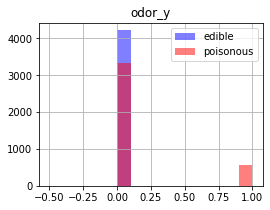

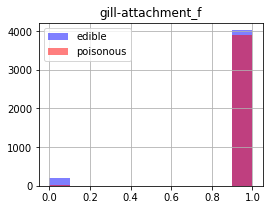

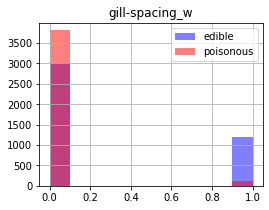

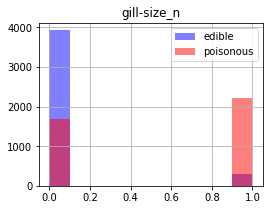

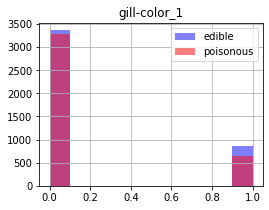

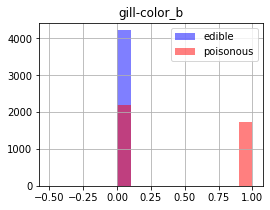

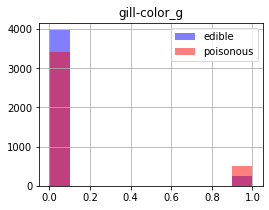

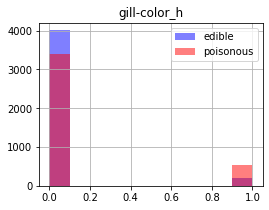

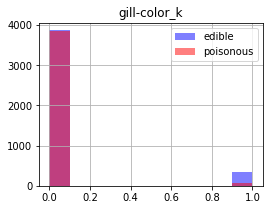

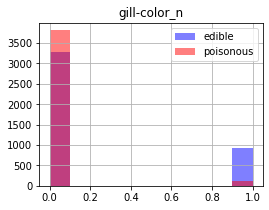

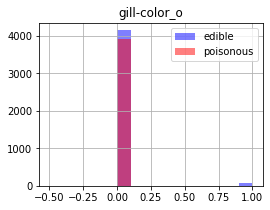

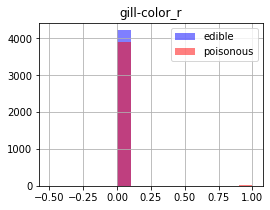

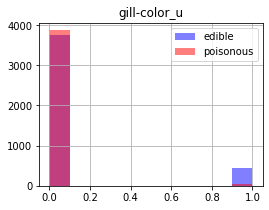

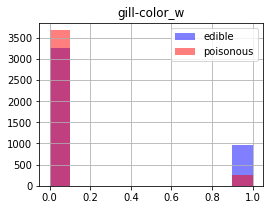

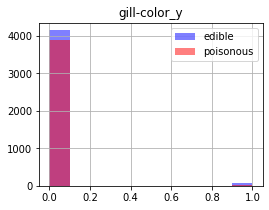

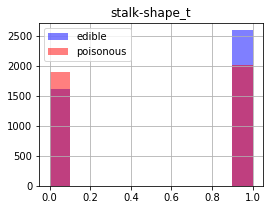

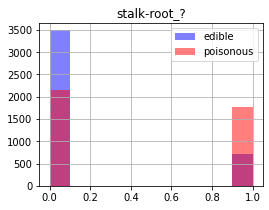

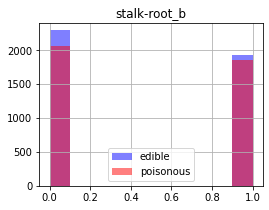

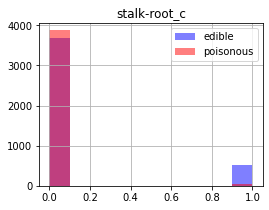

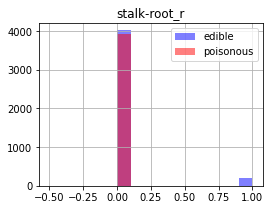

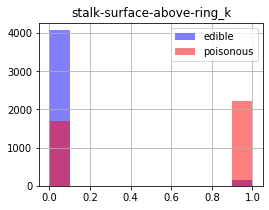

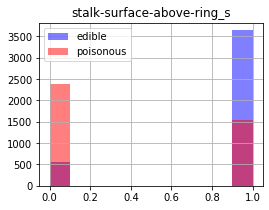

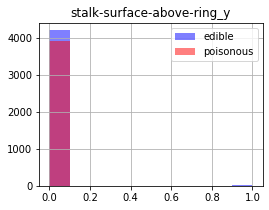

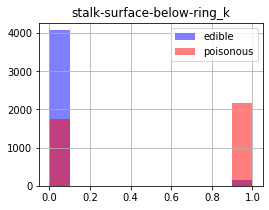

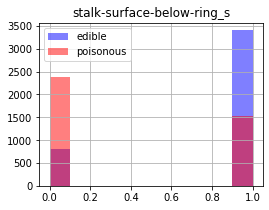

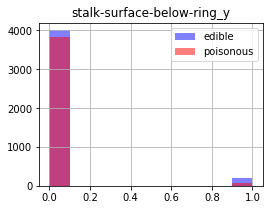

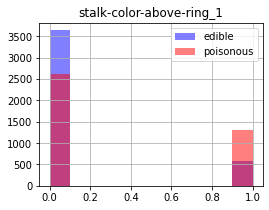

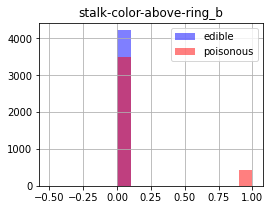

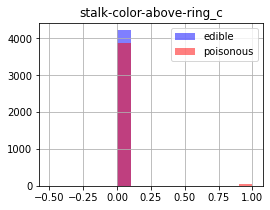

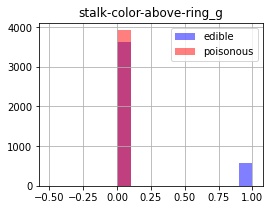

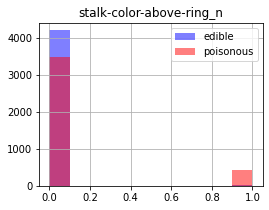

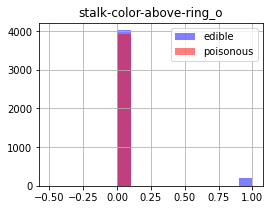

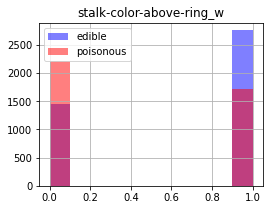

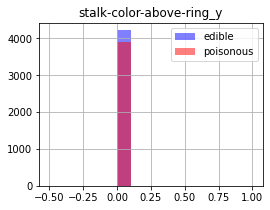

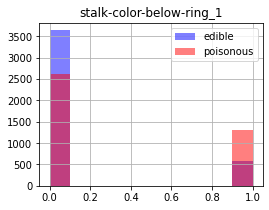

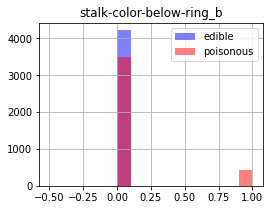

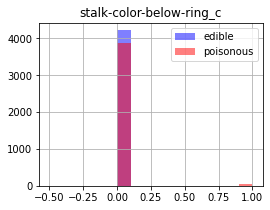

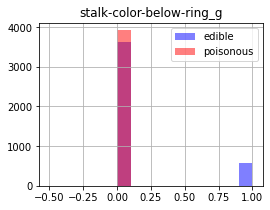

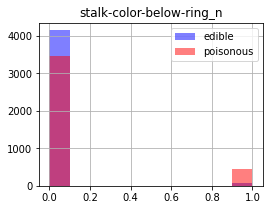

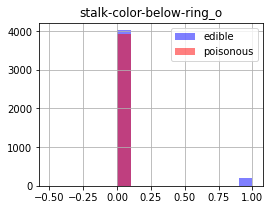

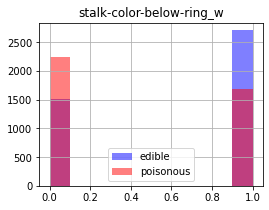

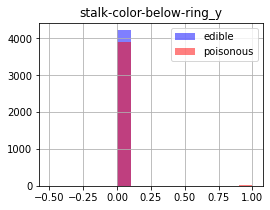

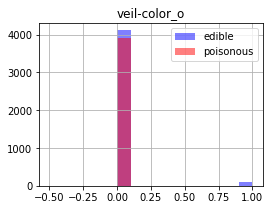

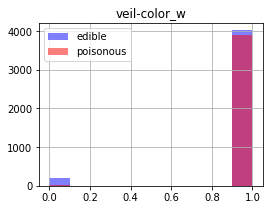

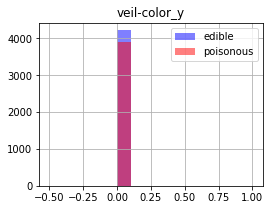

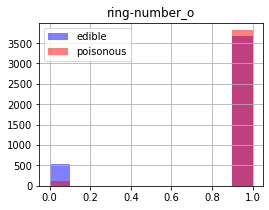

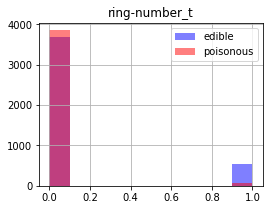

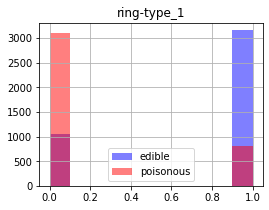

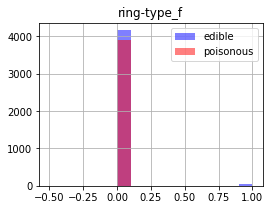

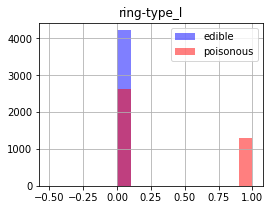

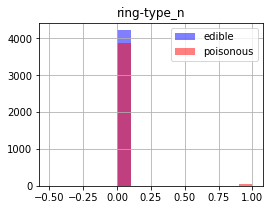

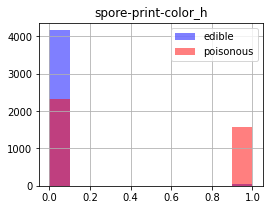

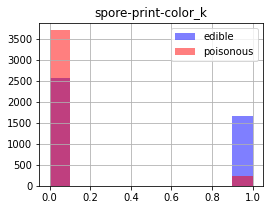

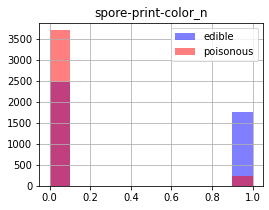

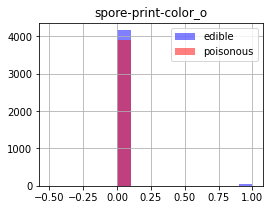

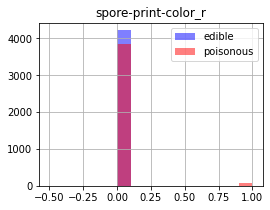

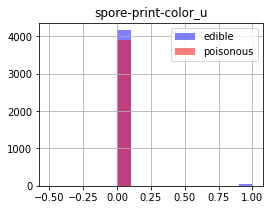

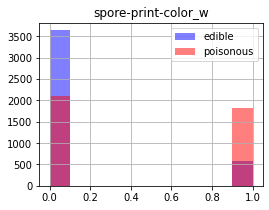

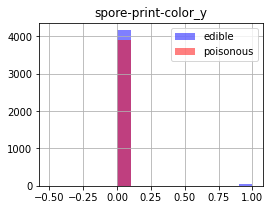

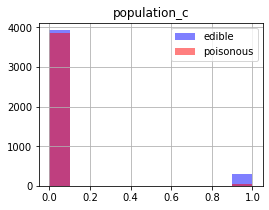

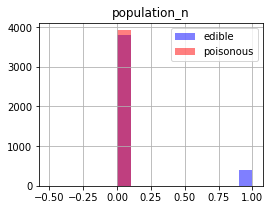

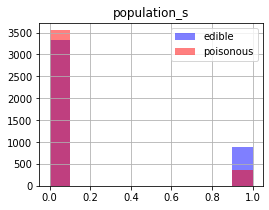

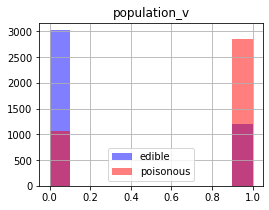

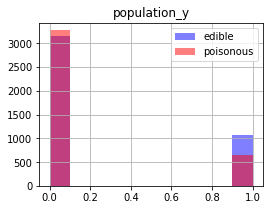

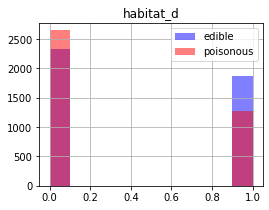

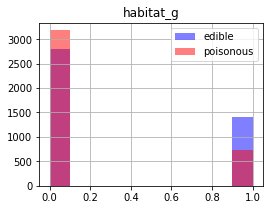

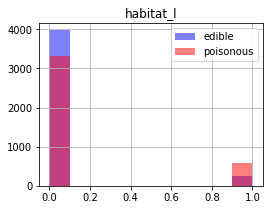

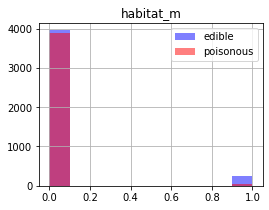

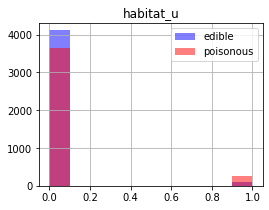

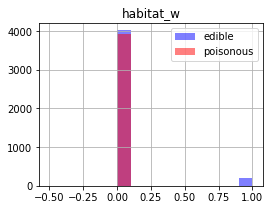

In [4]:
import matplotlib.pyplot as plt

# Гистограммы распределения значений для каждого признака и для каждого класса
for col in mushrooms.columns[1:]:
    fig, ax = plt.subplots(figsize=(4,3))
    mushrooms[mushrooms['class_1'] == 0][col].hist(alpha=0.5, ax=ax, color='blue')
    mushrooms[mushrooms['class_1'] == 1][col].hist(alpha=0.5, ax=ax, color='red')
    ax.set_title(col)
    ax.legend(['edible', 'poisonous'])
    plt.show()


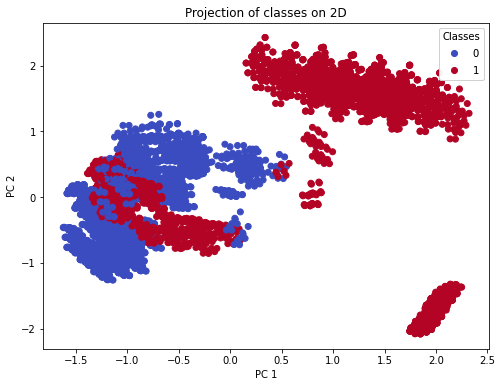

In [5]:
from sklearn.decomposition import PCA

# Визуализация проекций классов на плоскости
pca = PCA(n_components=2)
X = mushrooms.iloc[:, 1:].values
y = mushrooms.iloc[:, 0].values
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Projection of classes on 2D')
plt.show()

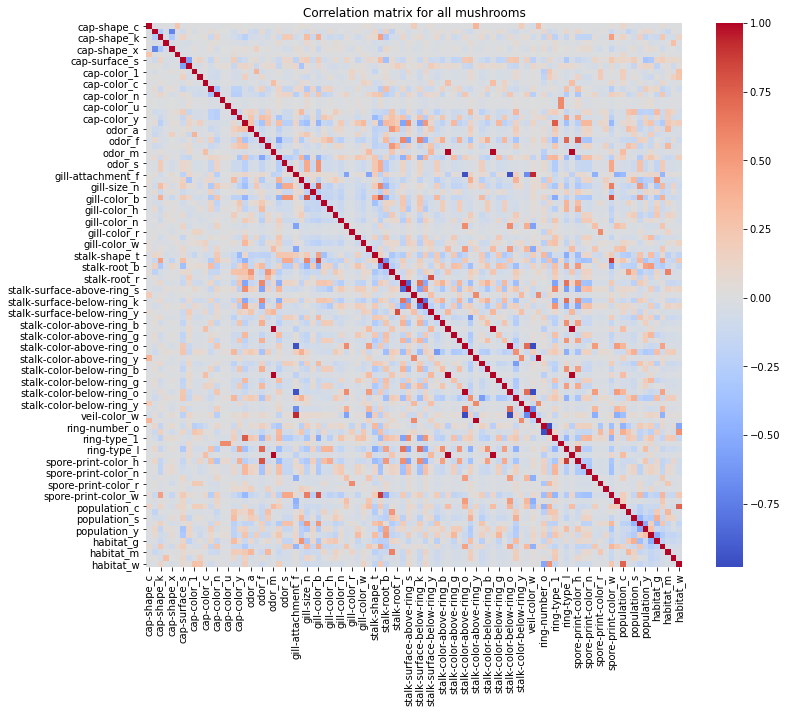

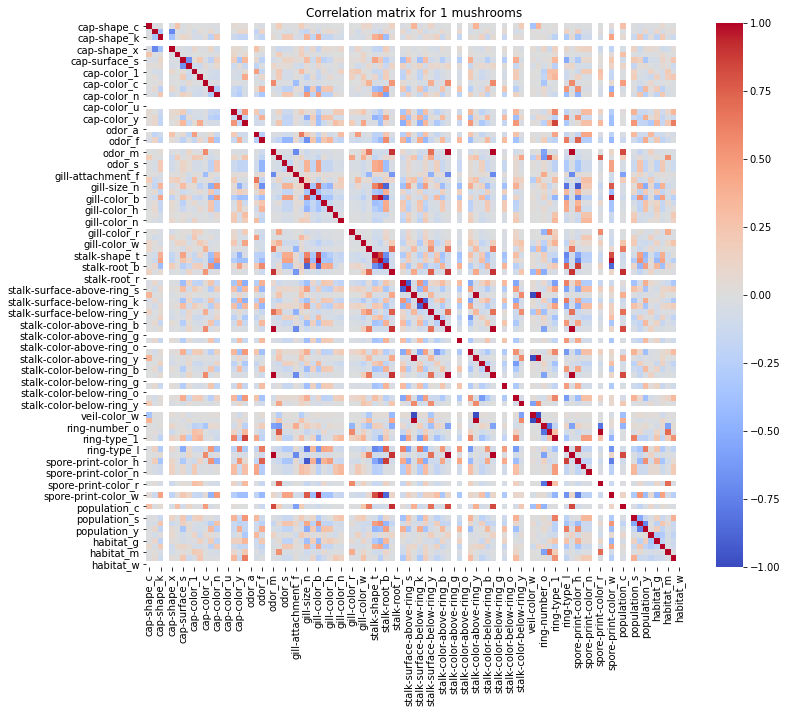

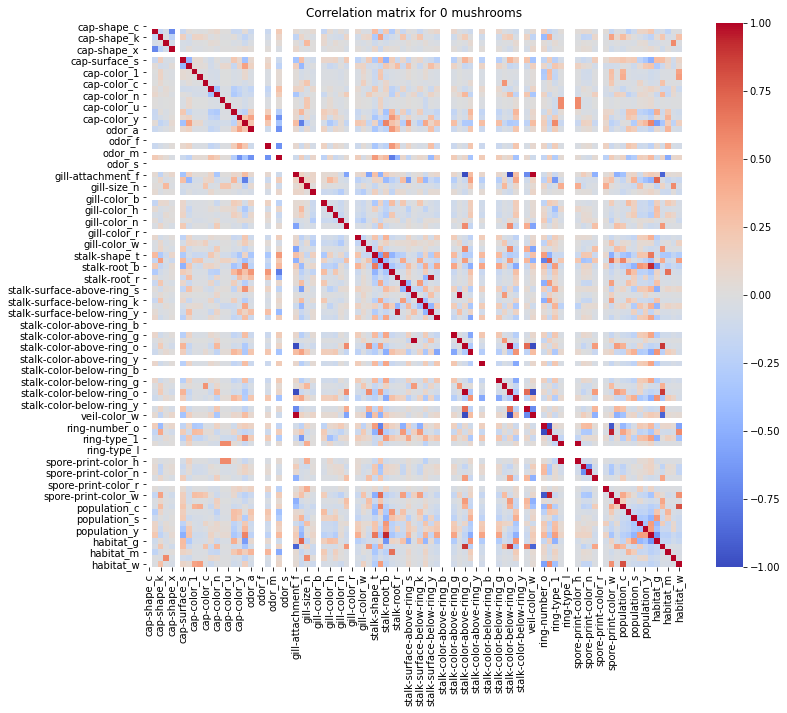

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создадим таблицу признаков и целевой переменной
X = mushrooms.iloc[:, 1:]
y = mushrooms.iloc[:, 0]

# Построим матрицу корреляций для всей выборки
corr_matrix_all = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_all, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix for all mushrooms')
plt.show()

# Построим матрицы корреляций для каждого класса
for c in y.unique():
    X_c = X[y == c]
    corr_matrix_c = X_c.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix_c, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation matrix for {c} mushrooms')
    plt.show()


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Разобъем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализируем наивный байесовский классификатор
nb = GaussianNB()

# Обучаем модель на обучающей выборке
nb.fit(X_train, y_train)

# Получаем прогнозы на тестовой выборке
y_pred = nb.predict(X_test)

# Вычисляем метрики качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion matrix:')
print(conf_matrix)


Accuracy: 0.96
Precision: 0.99
Recall: 0.93
F1-score: 0.96
Confusion matrix:
[[835   8]
 [ 52 730]]
